# Linear Regression Project

I will work with data related to different kind of vehicles.

The **goal** of this project is to make a model which can predict the price of a vehicle, given a sequence of features.

## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Get the data

The data includes Vehicle informations, such as the model, manufacturer,condition, size, color, etc.

In [2]:
cars = pd.read_csv('data/vehicles.csv')
cars.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7184791621,https://duluth.craigslist.org/ctd/d/duluth-200...,duluth / superior,https://duluth.craigslist.org,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,...,4wd,NaN,NaN,red,https://images.craigslist.org/00n0n_f06ykBMcdh...,2000 *** GMC New Sierra 1500 Ext Cab 157.5 WB...,NaN,mn,46.8433,-92.2550
1,7184773187,https://duluth.craigslist.org/cto/d/saginaw-20...,duluth / superior,https://duluth.craigslist.org,8750,2013.0,hyundai,sonata,excellent,4 cylinders,...,fwd,NaN,NaN,grey,https://images.craigslist.org/00d0d_kgZ6xoeRw2...,For Sale: 2013 Hyundai Sonata GLS - $8750. O...,NaN,mn,46.9074,-92.4638
2,7193375964,https://newhaven.craigslist.org/cto/d/stratfor...,new haven,https://newhaven.craigslist.org,10900,2013.0,toyota,prius,good,4 cylinders,...,fwd,NaN,NaN,blue,https://images.craigslist.org/00d0d_3sHGxPbY2O...,2013 Prius V Model Two. One owner—must sell my...,NaN,ct,41.1770,-73.1336
3,7195108810,https://albuquerque.craigslist.org/cto/d/albuq...,albuquerque,https://albuquerque.craigslist.org,12500,2003.0,mitsubishi,lancer,good,4 cylinders,...,4wd,mid-size,sedan,grey,https://images.craigslist.org/00m0m_4a8Pb6JbMG...,"2003 Mitsubishi Lancer Evolution, silver. Abo...",NaN,nm,35.1868,-106.6650
4,7184712241,https://duluth.craigslist.org/ctd/d/rush-city-...,duluth / superior,https://duluth.craigslist.org,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,...,4wd,full-size,truck,white,https://images.craigslist.org/01414_g093aPtSMW...,"**Bad Credit, No Credit... No Problem!**2007 G...",NaN,mn,45.6836,-92.9648


## EDA and Preprocessing

In [3]:
cars.shape

(423857, 25)

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423857 entries, 0 to 423856
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            423857 non-null  int64  
 1   url           423857 non-null  object 
 2   region        423857 non-null  object 
 3   region_url    423857 non-null  object 
 4   price         423857 non-null  int64  
 5   year          328743 non-null  float64
 6   manufacturer  313242 non-null  object 
 7   model         325384 non-null  object 
 8   condition     176719 non-null  object 
 9   cylinders     197679 non-null  object 
 10  fuel          327214 non-null  object 
 11  odometer      270585 non-null  float64
 12  title_status  327759 non-null  object 
 13  transmission  328065 non-null  object 
 14  vin           184420 non-null  object 
 15  drive         231119 non-null  object 
 16  size          102627 non-null  object 
 17  type          241157 non-null  object 
 18  pain

In [5]:
cars.iloc[370090] #View a single observation

id                                                     7191780500
url             https://siouxfalls.craigslist.org/ctd/d/sioux-...
region                                        sioux falls / SE SD
region_url                      https://siouxfalls.craigslist.org
price                                                        4900
year                                                       2012.0
manufacturer                                                 ford
model                                          focus se hatchback
condition                                               excellent
cylinders                                             4 cylinders
fuel                                                          gas
odometer                                                     82.0
title_status                                                clean
transmission                                            automatic
vin                                                           NaN
drive     

Let's see which columns have the most Nan's

In [6]:
cars.isna().sum().sort_values(ascending=False)

county          423857
size            321230
condition       247138
vin             239437
cylinders       226178
paint_color     201654
drive           192738
type            182700
odometer        153272
manufacturer    110615
long             99453
lat              99453
model            98473
fuel             96643
title_status     96098
transmission     95792
year             95114
description      94203
image_url        94196
url                  0
price                0
region_url           0
state                0
region               0
id                   0
dtype: int64

As we can see the `county` column has the most Nan's. Therefore, we can drop/delete it.

In [7]:
cars.drop('county',axis=1,inplace=True)

In [8]:
cars.describe().apply(lambda s: s.apply('{0:.5f}'.format)) # Get an overview of the data

,id,price,year,odometer,lat,long
count,423857.00000,423857.00000,328743.00000,270585.00000,324404.00000,324404.00000
mean,7190602108.85049,57794.37478,2009.82736,99425.78461,38.73143,-93.94937
std,5159268.77874,10025805.11645,10.13581,120483.31239,5.90298,17.93057
min,7178301636.00000,0.00000,1900.00000,0.00000,-80.38640,-161.39400
25%,7186687550.00000,4499.00000,2007.00000,44324.00000,35.05450,-106.67800
50%,7192067820.00000,9995.00000,2012.00000,91749.00000,39.36690,-88.00990
75%,7194909078.00000,18995.00000,2016.00000,137237.00000,42.51708,-80.83250
max,7197006076.00000,3808256046.00000,2021.00000,10000000.00000,80.38340,115.52400


#### Let's preprocess the numeric columns

In [9]:
cars_preprocessing = cars.copy()

As we can see, the `price` column contains outliers

F:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

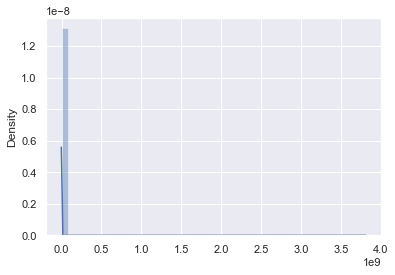

In [10]:
sns.distplot(x=cars_preprocessing['price'])

In [11]:
# i will keep only the 99% of the data
cars_preprocessing = cars_preprocessing[cars_preprocessing['price'] <=cars_preprocessing['price'].quantile(0.99)]

F:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

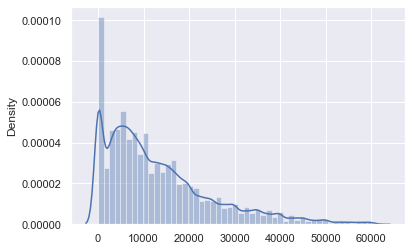

In [12]:
sns.distplot(x=cars_preprocessing['price'])

Let's apply the same logic for the `odometer` column

In [13]:
cars_preprocessing = cars_preprocessing[cars_preprocessing['odometer'] <= cars_preprocessing['odometer'].quantile(0.99)]

In [14]:
cars_preprocessing.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,id,price,year,odometer,lat,long
count,265145.00000,265145.00000,264292.00000,265145.00000,260150.00000,260150.00000
mean,7189028347.78916,14210.95870,2011.02471,95209.84541,38.94257,-94.05325
std,4746142.82105,11973.84541,7.96437,59079.70238,5.86483,18.13387
min,7178301636.00000,0.00000,1901.00000,0.00000,-80.38640,-161.39400
25%,7185450731.00000,5495.00000,2008.00000,44998.00000,35.18100,-108.57950
50%,7189993494.00000,11200.00000,2013.00000,91686.00000,39.52350,-87.86480
75%,7193313458.00000,19975.00000,2016.00000,136025.00000,42.68500,-80.81123
max,7195225072.00000,61500.00000,2021.00000,275000.00000,65.74360,94.16320


In [15]:
cars_preprocessing.shape

(265145, 24)

#### Now let's preprocess the object columns

* First we can display all the object columns

In [16]:
cars_preprocessing.select_dtypes('object').columns

Index(['url', 'region', 'region_url', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'title_status', 'transmission', 'vin', 'drive',
       'size', 'type', 'paint_color', 'image_url', 'description', 'state'],
      dtype='object')

* I will drop the `url`, `region_url`, `image_url` and `vin` columns, since they don't provide any significant information

In [17]:
cars_preprocessing.drop(['url','region_url','image_url','vin'],axis=1,inplace=True)

In [18]:
# Let's see the object columns
cars_preprocessing.select_dtypes('object').head()

,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,description,state
0,duluth / superior,gmc,new sierra 1500,excellent,8 cylinders,gas,clean,automatic,4wd,NaN,NaN,red,2000 *** GMC New Sierra 1500 Ext Cab 157.5 WB...,mn
1,duluth / superior,hyundai,sonata,excellent,4 cylinders,gas,clean,automatic,fwd,NaN,NaN,grey,For Sale: 2013 Hyundai Sonata GLS - $8750. O...,mn
2,new haven,toyota,prius,good,4 cylinders,hybrid,clean,automatic,fwd,NaN,NaN,blue,2013 Prius V Model Two. One owner—must sell my...,ct
4,duluth / superior,gmc,sierra classic 2500hd,good,8 cylinders,diesel,clean,automatic,4wd,full-size,truck,white,"**Bad Credit, No Credit... No Problem!**2007 G...",mn
5,duluth / superior,ford,f-150,good,6 cylinders,gas,clean,automatic,4wd,full-size,truck,grey,"**Bad Credit, No Credit... No Problem!**2012 F...",mn


Checking the relative frequencies of the unique values of the `cylinders` column

In [19]:
cars_preprocessing['cylinders'].value_counts(normalize=True,dropna=False)

NaN             0.348651
4 cylinders     0.236742
6 cylinders     0.233521
8 cylinders     0.169134
5 cylinders     0.005307
10 cylinders    0.002678
other           0.002150
3 cylinders     0.001407
12 cylinders    0.000411
Name: cylinders, dtype: float64

As we can see, the biggest proportion of the data is Nan (~35%). Moreover, i will keep only the first 4 values, since they represent the majority of the data.

In [20]:
cars_preprocessing = cars_preprocessing[cars_preprocessing['cylinders'].isin(['4 cylinders','6 cylinders','8 cylinders',np.nan])]

Since there are many Nan values, i will 'fill' them with the value of 5.5, instead of deleting them

In [21]:
cars_preprocessing.cylinders.fillna(5.5,inplace=True)

In [22]:
cars_preprocessing.cylinders.value_counts(dropna=False,normalize=True)

5.5            0.352868
4 cylinders    0.239606
6 cylinders    0.236346
8 cylinders    0.171180
Name: cylinders, dtype: float64

Finally, i will map the string values into integers.

In [23]:
cars_preprocessing['cylinders'] = cars_preprocessing['cylinders'].map({5.5:5.5,'4 cylinders':4,'6 cylinders':6,'8 cylinders':8})

In [24]:
cars_preprocessing.shape

(261976, 20)

Once again, let's see the Nan's per object column.

In [25]:
cars_preprocessing.select_dtypes('object').isna().sum().sort_values(ascending=False)

size            174462
condition       115708
paint_color      66959
drive            60274
type             47853
manufacturer      9317
fuel              2134
model             1939
title_status      1606
transmission      1203
description          6
region               0
state                0
dtype: int64

Checking the relative frequencies of the unique values of the `size` column

In [26]:
cars_preprocessing['size'].value_counts(dropna=False,normalize=True)

NaN            0.665946
full-size      0.169031
mid-size       0.102215
compact        0.053806
sub-compact    0.009001
Name: size, dtype: float64

Since the majority of the values are Nan's, i will drop the column

In [27]:
cars_preprocessing.drop('size',axis=1,inplace=True)

Checking the relative frequencies of the unique values of the `condition` column

In [28]:
cars_preprocessing['condition'].value_counts(dropna=False,normalize=True)

NaN          0.441674
excellent    0.271563
good         0.211836
like new     0.054173
fair         0.017063
new          0.002512
salvage      0.001179
Name: condition, dtype: float64

Again, i will drop it for the same reason

In [29]:
cars_preprocessing.drop('condition',axis=1,inplace=True)

In [30]:
# Drop the id column
cars_preprocessing.drop('id',axis=1,inplace = True)

Create dummies for the `state` column

In [31]:
dummies_for_state = pd.get_dummies(cars_preprocessing.state,drop_first=True,prefix='state')

Join the dataframes

In [32]:
cars_preprocessing = pd.concat([cars_preprocessing,dummies_for_state],axis=1)

The unique values for the `region` column are too many. It isn't benefitial to get dummies for it. Therefore, i will drop it

In [33]:
len(cars_preprocessing.region.value_counts())

399

In [34]:
cars_preprocessing.drop('region',axis=1,inplace=True)

Let's deal with the `manufacturer` column

In [35]:
cars_preprocessing.manufacturer.value_counts(dropna=False,normalize=True)

ford               0.179551
chevrolet          0.138268
toyota             0.082351
honda              0.059055
nissan             0.056108
jeep               0.044493
gmc                0.038992
dodge              0.038469
ram                0.037511
NaN                0.035564
hyundai            0.028281
subaru             0.026388
bmw                0.025266
kia                0.022540
mercedes-benz      0.021166
volkswagen         0.020987
chrysler           0.018131
buick              0.014352
cadillac           0.014265
lexus              0.012906
mazda              0.012772
audi               0.010917
acura              0.008944
lincoln            0.007947
infiniti           0.007703
pontiac            0.006100
mitsubishi         0.005814
volvo              0.004481
mini               0.004126
mercury            0.003768
rover              0.003756
saturn             0.003126
jaguar             0.002191
fiat               0.001802
tesla              0.000794
alfa-romeo         0

For convenience i will keep those manufacturers who appear at least 1% in the data

In [36]:
cars_preprocessing.manufacturer.value_counts(dropna=False,normalize=True)[:22].index.values

array(['ford', 'chevrolet', 'toyota', 'honda', 'nissan', 'jeep', 'gmc',
       'dodge', 'ram', nan, 'hyundai', 'subaru', 'bmw', 'kia',
       'mercedes-benz', 'volkswagen', 'chrysler', 'buick', 'cadillac',
       'lexus', 'mazda', 'audi'], dtype=object)

In [37]:
cars_preprocessing = cars_preprocessing[cars_preprocessing['manufacturer'].isin(['ford', 'chevrolet', 'toyota', 'honda', 'nissan', 'jeep', 'gmc',
       'dodge', 'ram', 'hyundai', 'subaru', 'bmw', 'kia',
       'mercedes-benz', 'volkswagen', 'chrysler', 'buick', 'cadillac',
       'lexus', 'mazda', 'audi'])]

In [38]:
cars_preprocessing.head()

,price,year,manufacturer,model,cylinders,fuel,odometer,title_status,transmission,drive,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,6995,2000.0,gmc,new sierra 1500,8.0,gas,167783.0,clean,automatic,4wd,...,0,0,0,0,0,0,0,0,0,0
1,8750,2013.0,hyundai,sonata,4.0,gas,90821.0,clean,automatic,fwd,...,0,0,0,0,0,0,0,0,0,0
2,10900,2013.0,toyota,prius,4.0,hybrid,92800.0,clean,automatic,fwd,...,0,0,0,0,0,0,0,0,0,0
4,16995,2007.0,gmc,sierra classic 2500hd,8.0,diesel,254217.0,clean,automatic,4wd,...,0,0,0,0,0,0,0,0,0,0
5,13995,2012.0,ford,f-150,6.0,gas,188406.0,clean,automatic,4wd,...,0,0,0,0,0,0,0,0,0,0


Create dummies for the `manufacturer` column

In [39]:
dummies_for_manufacturer = pd.get_dummies(cars_preprocessing.manufacturer,drop_first=True)

Join the dataframes

In [40]:
cars_preprocessing = pd.concat([cars_preprocessing,dummies_for_manufacturer],axis=1)

In [41]:
cars_preprocessing.drop('manufacturer',axis=1,inplace=True)

In [42]:
cars_preprocessing.select_dtypes('object').head()

,model,fuel,title_status,transmission,drive,type,paint_color,description,state
0,new sierra 1500,gas,clean,automatic,4wd,NaN,red,2000 *** GMC New Sierra 1500 Ext Cab 157.5 WB...,mn
1,sonata,gas,clean,automatic,fwd,NaN,grey,For Sale: 2013 Hyundai Sonata GLS - $8750. O...,mn
2,prius,hybrid,clean,automatic,fwd,NaN,blue,2013 Prius V Model Two. One owner—must sell my...,ct
4,sierra classic 2500hd,diesel,clean,automatic,4wd,truck,white,"**Bad Credit, No Credit... No Problem!**2007 G...",mn
5,f-150,gas,clean,automatic,4wd,truck,grey,"**Bad Credit, No Credit... No Problem!**2012 F...",mn


Let's explore the `model` column

In [43]:
cars_preprocessing.model.value_counts()[:30]

f-150             5110
silverado 1500    3224
escape            2738
1500              2404
camry             2296
accord            2096
altima            2082
explorer          2082
grand cherokee    1930
civic             1929
corolla           1760
equinox           1742
fusion            1705
grand caravan     1668
silverado         1622
malibu            1614
mustang           1525
focus             1509
cr-v              1504
wrangler          1392
rogue             1359
cruze             1355
tacoma            1343
outback           1328
2500              1326
tahoe             1311
rav4              1255
edge              1238
impala            1214
elantra           1207
Name: model, dtype: int64

I will drop it since it contains too many different values (it isn't benefitial to get dummies for it)

In [44]:
cars_preprocessing.drop('model',axis=1,inplace=True)

Let's explore the `fuel` column

In [45]:
cars_preprocessing.fuel.value_counts(dropna=False,normalize=True)

gas         0.876099
diesel      0.064130
other       0.037598
hybrid      0.013048
NaN         0.007095
electric    0.002030
Name: fuel, dtype: float64

I will keep only the top 2 categories

In [46]:
cars_preprocessing = cars_preprocessing[cars_preprocessing['fuel'].isin(['gas','diesel'])]

* Convert the string values into integers

In [47]:
cars_preprocessing['fuel'] = cars_preprocessing['fuel'].map({'gas':0,'diesel':1})

Drop the `state` column

In [48]:
cars_preprocessing.drop('state',axis=1,inplace=True)

Let's explore the `title_status` column

In [49]:
cars_preprocessing.title_status.value_counts(normalize=True,dropna=False)

clean         0.961595
rebuilt       0.018996
salvage       0.008900
lien          0.006071
NaN           0.003589
missing       0.000616
parts only    0.000234
Name: title_status, dtype: float64

I will keep only the top categories

In [50]:
cars_preprocessing = cars_preprocessing[cars_preprocessing['title_status'].isin(['clean','rebuilt'])]

* Convert the string values into integers

In [51]:
cars_preprocessing['title_status'] = cars_preprocessing['title_status'].map({'clean':0,'rebuilt':1})

Let's explore the `transmission` column

In [52]:
cars_preprocessing.transmission.value_counts(normalize=True,dropna=False)

automatic    0.903275
manual       0.056207
other        0.036927
NaN          0.003591
Name: transmission, dtype: float64

Again, i will keep only the top categories

In [53]:
cars_preprocessing = cars_preprocessing[cars_preprocessing['transmission'].isin(['automatic','manual'])]

* Convert the string values into integers

In [54]:
cars_preprocessing['transmission']=cars_preprocessing['transmission'].map({'automatic':0,'manual':1})

Now, let's see the `drive` column

In [55]:
cars_preprocessing.drive.value_counts(normalize=True,dropna=False)

4wd    0.351812
fwd    0.305759
NaN    0.216957
rwd    0.125473
Name: drive, dtype: float64

I will keep those categories which are not Nan's

In [56]:
cars_preprocessing = cars_preprocessing[cars_preprocessing['drive'].notna()]

Now it's time to create dummies for this column

In [57]:
dummies_for_drive = pd.get_dummies(cars_preprocessing.drive,drop_first=True)

In [58]:
cars_preprocessing = pd.concat([cars_preprocessing,dummies_for_drive],axis=1)
cars_preprocessing.drop('drive',axis=1,inplace=True)

Let's explore the `type` column

In [59]:
cars_preprocessing.type.value_counts(normalize=True,dropna=False)

SUV            0.252902
sedan          0.242361
truck          0.116752
NaN            0.113578
pickup         0.090584
coupe          0.037937
wagon          0.034201
van            0.029440
hatchback      0.024941
mini-van       0.022445
convertible    0.017140
other          0.015291
offroad        0.001770
bus            0.000659
Name: type, dtype: float64

As we can see, there are too many different values. Therefore i will drop it.

In [60]:
cars_preprocessing.drop('type',axis=1,inplace=True)

Same process for the `paint_color` column

In [61]:
cars_preprocessing.paint_color.value_counts(normalize=True,dropna=False)

white     0.203545
NaN       0.186491
black     0.157899
silver    0.123479
grey      0.087971
blue      0.084401
red       0.079896
custom    0.025674
green     0.020503
brown     0.017946
yellow    0.005268
orange    0.004743
purple    0.002185
Name: paint_color, dtype: float64

In [62]:
cars_preprocessing.drop('paint_color',axis=1,inplace=True)

Finally, i will drop the `lat`, `long` and `description` columns.

In [63]:
cars_preprocessing.drop(['lat', 'long','description'],axis=1,inplace=True)

In [64]:
pd.options.display.max_rows = 9999
cars_preprocessing.describe().T[:5]

,count,mean,std,min,25%,50%,75%,max
price,163826.0,14100.274187,11862.796102,0.0,5500.0,10999.0,19700.0,61500.0
year,163826.0,2011.108957,7.617973,1921.0,2008.0,2013.0,2016.0,2021.0
cylinders,163826.0,5.733739,1.404855,4.0,4.0,5.5,6.0,8.0
fuel,163826.0,0.073212,0.260485,0.0,0.0,0.0,0.0,1.0
odometer,163826.0,98127.164766,59067.097620,0.0,48474.0,94800.0,139000.0,275000.0


As we can see, the minimum value in the `price` column is 0. Therefore, i will filter the data

<AxesSubplot:ylabel='Frequency'>

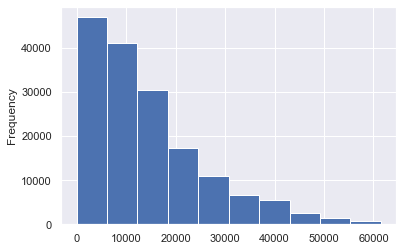

In [65]:
cars_preprocessing['price'].plot.hist()

In [66]:
cars_preprocessing = cars_preprocessing[cars_preprocessing['price'] >= 799]

Now it's time to declare the *features* and the *target* variables

In [67]:
x= cars_preprocessing.drop('price',axis=1)
y = cars_preprocessing['price']

## Scale te data

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

## Train - Test Split

In [69]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=101)

In [70]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(117770, 78) (117770,) (29443, 78) (29443,)


## Train different models

In [71]:
from sklearn.metrics import mean_absolute_error

* Decision Tree Regression

In [72]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

dtr.fit(x_train,y_train)

R_squared = dtr.score(x_test,y_test)

print('R^2 is:', R_squared)

R^2 is: 0.8352842714981314


In [73]:
MAE = mean_absolute_error(y_test,dtr.predict(x_test))
print('Mean Absolute Error: ', MAE)

Mean Absolute Error:  2305.92406965181


* Random Forest Regression

In [74]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=200)

rfr.fit(x_train,y_train)

R_squared = rfr.score(x_test,y_test)
print('R^2 is:', R_squared)

R^2 is: 0.8992121632731297


In [75]:
MAE = mean_absolute_error(y_test,rfr.predict(x_test))
print('Mean Absolute Error: ', MAE)

Mean Absolute Error:  2023.8819761407183


* XGBoost Regression

In [76]:
from xgboost import XGBRegressor

xgbr = XGBRegressor()

xgbr.fit(x_train,y_train)

R_squared = xgbr.score(x_test,y_test)
print('R^2 is:', R_squared)

R^2 is: 0.8542906157976013


In [77]:
MAE = mean_absolute_error(y_test,xgbr.predict(x_test))
print('Mean Absolute Error: ', MAE)

Mean Absolute Error:  2931.4157570615207


## Conclusion

#### Overall, Random Forest Regressor is the best model, with ~90% accuracy